In [25]:
import pandas as pd
import numpy as np

import os
import math
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [99]:
df = pd.read_csv('train.csv')
df.columns = ['Id', 'Province', 'Country', 'Lat', 'Long', 'Date', 'ConfirmedCases', 'Fatalities']
df.Province = df.Province.astype(str)
df.Province = df.apply(lambda row: row.Country if row.Province == 'nan' else '{}-{}'.format(row.Province, row.Country), axis = 1)
df.Date = df.Date.apply(lambda x: x[6:])

In [100]:
df.head()

,Id,Province,Country,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,Afghanistan,33.0,65.0,1-22,0.0,0.0
1,2,Afghanistan,Afghanistan,33.0,65.0,1-23,0.0,0.0
2,3,Afghanistan,Afghanistan,33.0,65.0,1-24,0.0,0.0
3,4,Afghanistan,Afghanistan,33.0,65.0,1-25,0.0,0.0
4,5,Afghanistan,Afghanistan,33.0,65.0,1-26,0.0,0.0


In [96]:
provincies = df['Province'].unique()

In [97]:
dates = df.Date.unique()

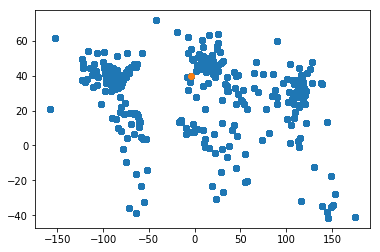

In [41]:
plt.scatter(df[ 'Long'], df['Lat'])
plt.scatter(-4, 40)

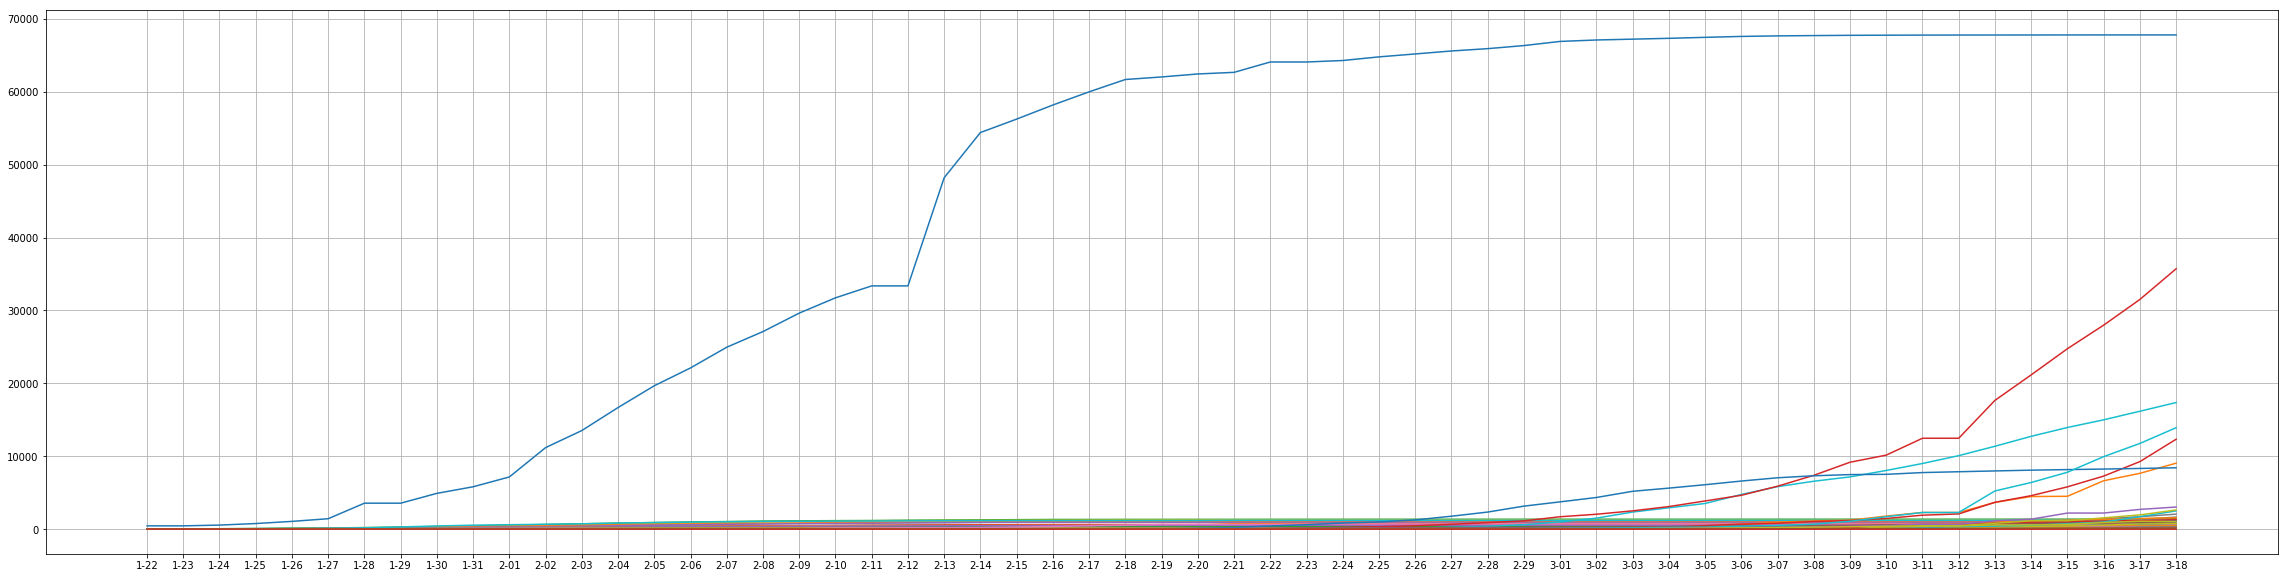

In [110]:
plt.figure(figsize=(40, 10))
for country in tqdm_notebook(provincies):
    plt.plot(df[df.Province == country].Date, df[df.Province == country].ConfirmedCases)
plt.grid(True)

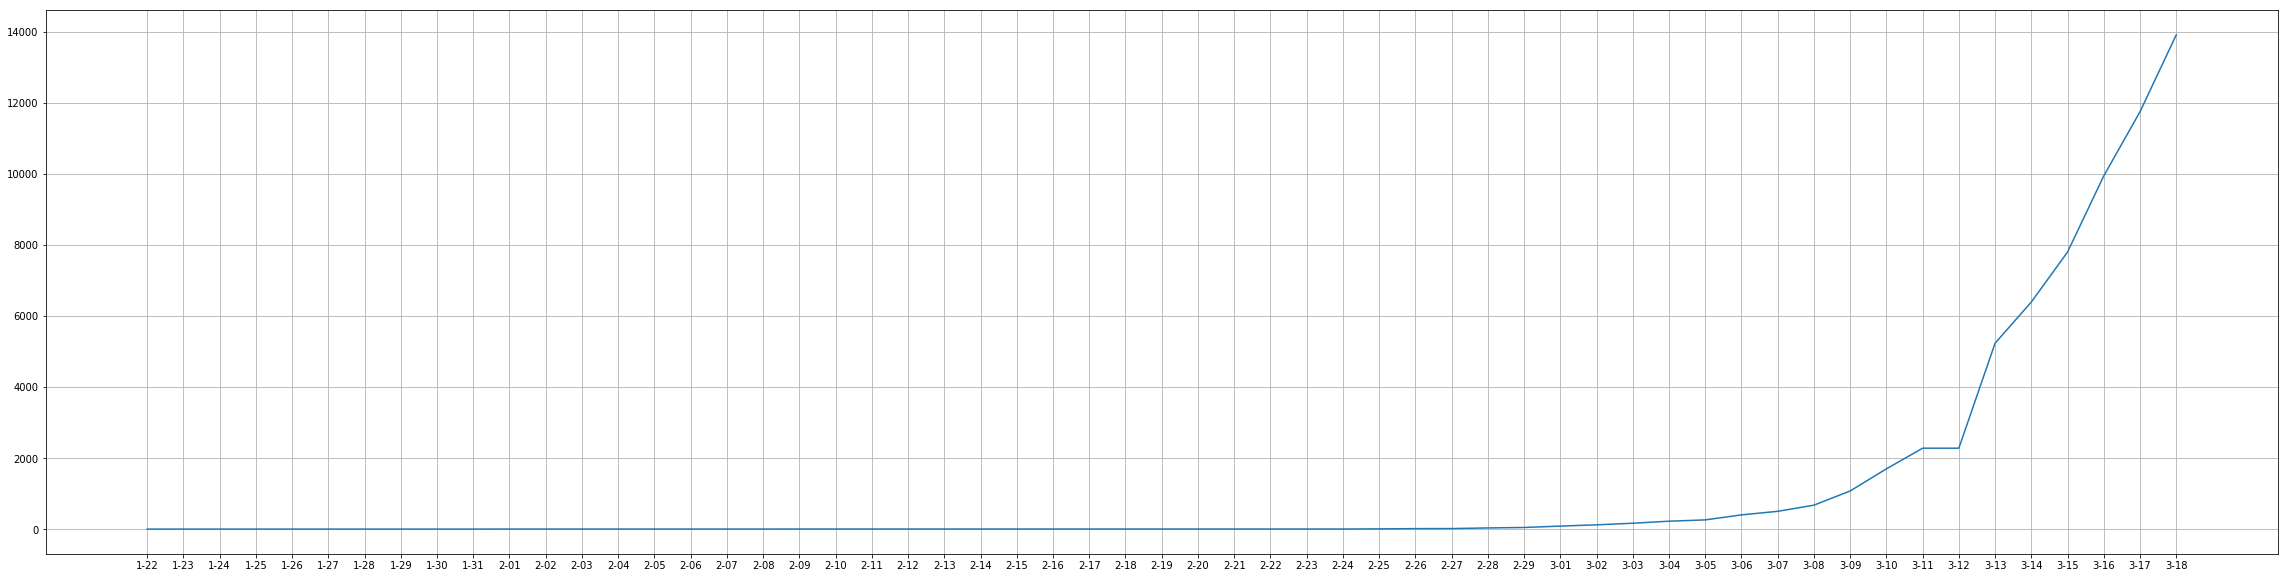

In [111]:
plt.figure(figsize=(40, 10))
for country in tqdm_notebook(df[df.Country == 'Spain'].Province.unique()):
    plt.plot(df[df.Province == country].Date, df[df.Province == country].ConfirmedCases)
plt.grid(True)

In [112]:
df_start = df[df.ConfirmedCases != 0]

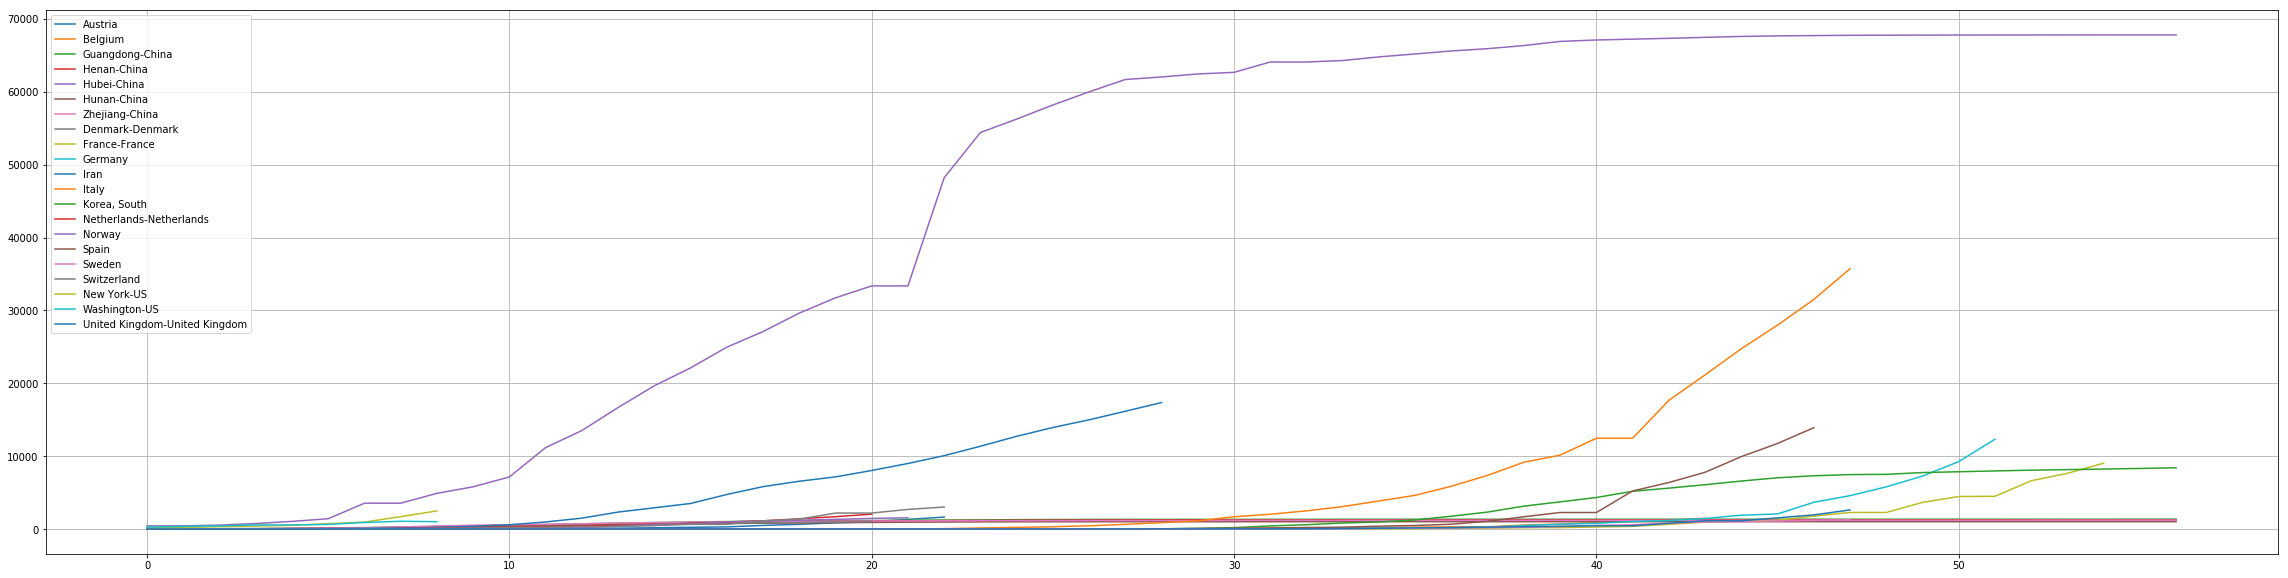

In [134]:
_prov = []
plt.figure(figsize=(40, 10))
for country in tqdm_notebook(filter(lambda x: x, provincies)):
    if len(df_start[df_start.Province == country].ConfirmedCases.values) > 0 and df_start[df_start.Province == country].ConfirmedCases.values[-1] > 1000:
        plt.plot(range(df_start[df_start.Province == country].shape[0]), df_start[df_start.Province == country].ConfirmedCases, label = country)
        _prov.append(country)
plt.grid(True)
plt.legend()

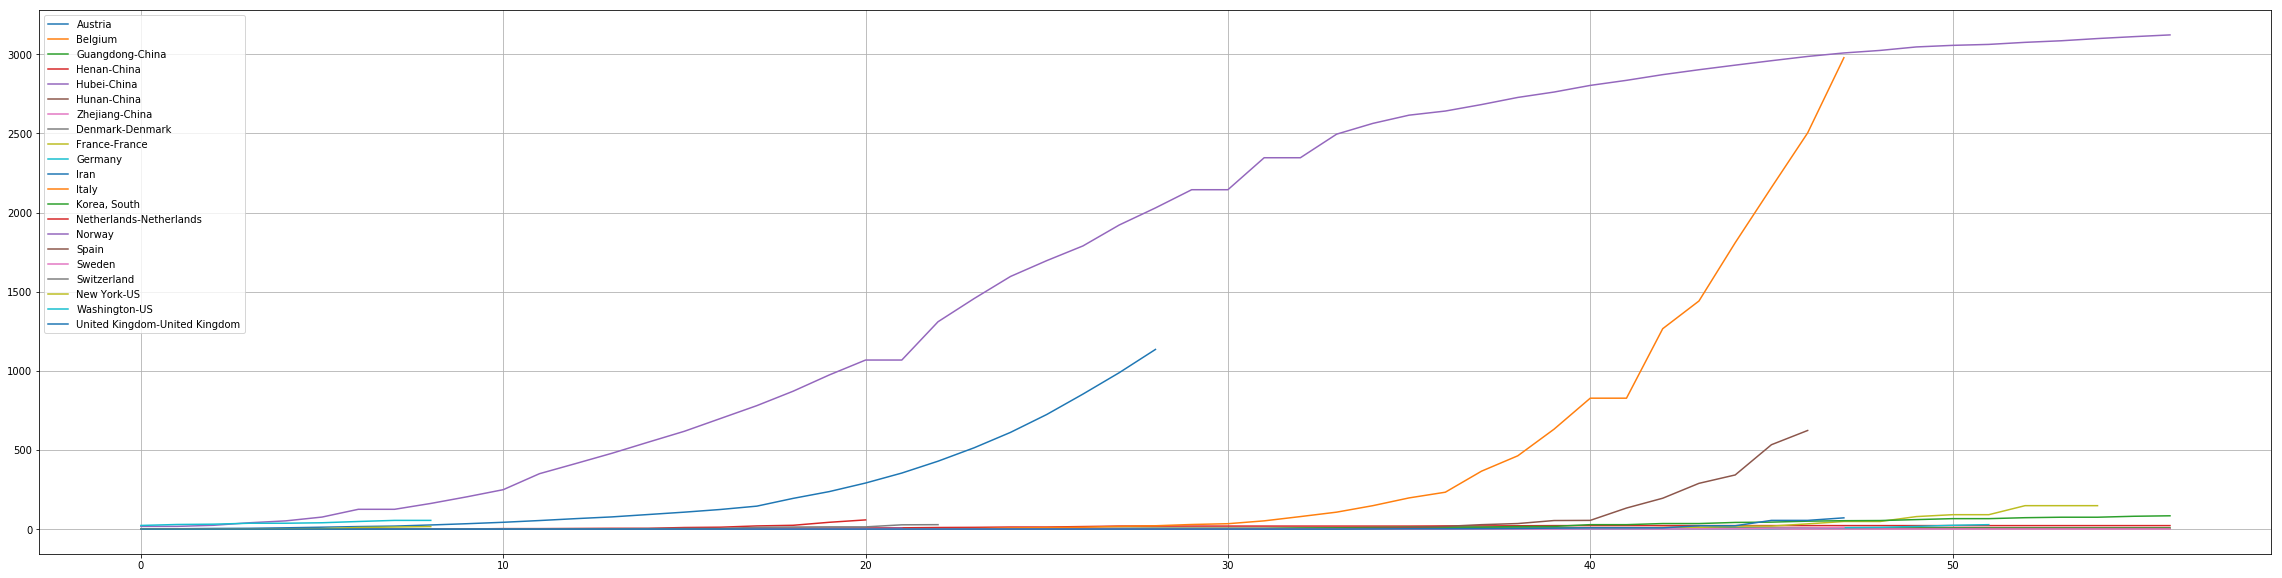

In [135]:
_prov = []
plt.figure(figsize=(40, 10))
for country in tqdm_notebook(filter(lambda x: x, provincies)):
    if len(df_start[df_start.Province == country].ConfirmedCases.values) > 0 and df_start[df_start.Province == country].ConfirmedCases.values[-1] > 1000:
        plt.plot(range(df_start[df_start.Province == country].shape[0]), df_start[df_start.Province == country].Fatalities, label = country)
        _prov.append(country)
plt.grid(True)
plt.legend()

In [136]:
# World Map

In [146]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
#import earthpy as et

In [142]:
# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

In [147]:
worldBound_path = 'world-map-data/global/ne_110m_land/ne_110m_land.shp'
worldBound = gpd.read_file(worldBound_path)

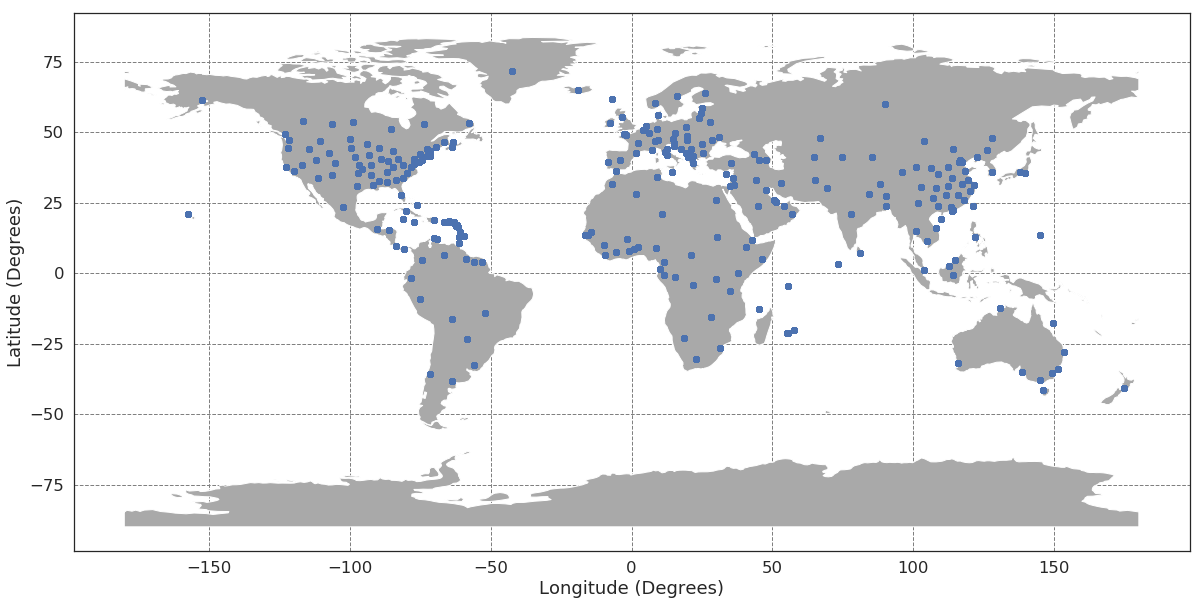

In [154]:
# Plot worldBound data using geopandas
fig, ax = plt.subplots(figsize=(20, 10))
worldBound.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",)

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')
ax.scatter(df[ 'Long'], df['Lat'])